<h1 align="center">Feature Selection</h1>

## Program so far

***

- Basics of Python
- Descriptive and Inferential Statistics
- Linear Regression
- L1/L2 Regularization
- Basic data cleaning and Preprocessing
- Feature extraction and Feature engineering

## What are we going to learn today ?
***



- What is Feature Selection
- Importance of Feature Selection
- Why to use Feature Selection 
- Types of Feature Selection
	- Univariate Feature Selection
		- Method 1: Removing features with low variance
		- Method 2: Pearson Correlation
- Sklearn for Feature Selection
- Feature Selection techniques
	- Filter Methods
		- Pearson's Correlation
		- LDA (Linear Discriminant Analysis)
		- ANOVA (Anaysis of Variance)
		- Chi-Square
		- Filter Method - Vulnerability	
	- Wrapper Methods
		- Forward Feature Selection
		- Backward Feature Elimination / Recursive Feature Elimination	
	- Embedded Methods
	- Difference between Filter and Wrapper methods
    - Walk-through example

## What is Feature Selection?
***
* In machine learning and statistics, feature selection, also known as variable selection, attribute selection or variable subset selection, is the process of selecting a subset of relevant features (variables, predictors) for use in model construction.

## Importance of Feature Selection
***
* This becomes even more important when the number of features are very large.
* You need not use every feature at your disposal for creating an algorithm. 
* You can assist your algorithm by feeding in only those features that are really important.

## Why to use feature selection?
***
- It enables the machine learning algorithm to **train faster**.
- It **reduces the complexity** of a model and makes it easier to interpret.
- It **improves the accuracy** of a model if the right subset is chosen.
- It reduces **overfitting**.

# Types of Feature Selection
***
Different types of feature selection:-

* Univariate Feature Selection
* Multivariate Feature Selection


<img src="../images/Technical-Stuff.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Univariate Feature Selection (1/2)
***

* Univariate feature selection methods examine -
    - the predictive power of individual features
    - the strength of the relationship of the feature with the response variable
* These methods are simple to run and understand
* They also prove to be good for gaining a better understanding of data, and can often be the starting point for multivariate feature selection methods

<img src="../images/Technical-Stuff.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Univariate Feature Selection (2/2)
***

* We can look at the interaction between the top variables instead of all possible combinations
* These methods are not necessarily good for optimizing the feature set for better generalization

### Method 1 : Removing features with low variance 
***
* One of the most basic, yet a very powerful feature selection technique is to remove features with low variance. 
* We want to remove all features whose variance doesn't meet some threshold
* For example, a feature with 0 variance means it has the same value for every sample. This means that such a feature would not bring any predictive power to the model. 
* Hence, we should remove all such zero-variance features


### Example on code
***
* Let's take a dataset with boolean features, and we want to remove all features that are either one or zero (on or off) in more than 80% of the samples. How do we that?

* Answer : Boolean features are Bernoulli random variables, and the variance of such variables is given by 
    $$ Var(x) = p(1-p) $$

* *from sklearn.feature_selection import VarianceThreshold*   is a handy method to remove such features


In [52]:
from sklearn.feature_selection import VarianceThreshold
X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(X)

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

### Method 2 : Pearson Correlation
***
* Another method is using Pearson Correlation
* The population correlation coefficient  $ρ_{(X,Y)}$  between two random variables  X and  Y with expected values  $μ_X$  and  $μ_Y$  and standard deviations  $σ_X$ and  $σ_Y$.
* It is used as a measure for quantifying linear dependence between two continuous variables X and Y. Its value varies from -1 to +1. Pearson’s correlation is given as:
$$ \rho_{X,Y} = corr(X,Y) = \frac{cov(X,Y)}{\sigma_{X}\sigma_{X}} = \frac{E[(X-\mu_{X})(Y-\mu_{Y})]}{\sigma_{X}\sigma_{X}} $$ <br/>
   
* where E is the expected value operator, cov means covariance, and corr is a widely used alternative notation for the correlation coefficient.

### Pearson Correlation
***
* One of the simplest method for understanding a feature's relation to the response variable is Pearson correlation coefficient, which measures linear correlation between two variables
* Scipy's Pearson's method computes both the correlation and p-value for the correlation, roughly showing the probability of an uncorrelated system creating a correlation value of this magnitude.

In [53]:
from scipy.stats import pearsonr
import pandas as pd
import numpy as np

iowa = pd.read_csv('../data/house_prices_multivariate.csv')

X = iowa.iloc[:,:-1]
y = iowa.iloc[:,-1]

for i in X.columns:
    print(pearsonr(X[i],y))

(0.21333063767622742, 1.17375867228044e-15)
(0.2529214590904538, 1.4393180302090238e-21)
(0.7872278260873349, 2.1445443005885547e-291)
(-0.0952777413224411, 0.0003956290615016182)
(0.5075840635608162, 3.4952090879764857e-91)
(0.5054340608594549, 2.6380742157957248e-90)
(0.46313912358889814, 2.9820001700080498e-74)
(0.37556275564606306, 1.9661359169716295e-47)
(-0.023242905914850134, 0.3884363404853646)
(0.21313492312249654, 1.2477039987503075e-15)
(0.6035834052193846, 1.2138812661326489e-137)
(0.5949352701531119, 8.443442692466083e-133)
(0.3133355898234007, 8.586805601804292e-33)
(-0.00836439519630622, 0.756306487270347)
(0.708172113954018, 2.0881561463430674e-210)
(0.2259880120602367, 1.9869617037193285e-17)
(-0.02565087567084923, 0.3411805469578919)
(0.5565503021306587, 5.531853884328958e-113)
(0.2707212077054507, 1.3703337439160485e-24)
(0.1646549492106765, 7.703213398827432e-10)
(-0.13557396150699427, 4.3422728354803543e-07)
(0.5383091241374475, 1.931915358586909e-104)
(0.448877482

### Pearson Correlation
***
* With smaller amount of noise, the correlation is relatively strong, with a very low p-value
* However, for the noisy comparison, the correlation is very small and p-value is very high
* The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets

### Pearson Correlation: 
***
* Pearson correlation is the ratio of co-variance of two variables to the product of standard deviation of the variables
* The correlation coefficient has values between -1 to 1
    - A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
    - A value closer to 1 implies stronger positive correlation
    - A value closer to -1 implies stronger negative correlation


### Pearson Correlation
***
**Correlation is not Transitive:**

* Let  X,  Y and  Z be random variables.
    - $\rho_{X,Y}$ > 0.8
    - $\rho_{Y,Z}$ > 0.7

* Can we say  $\rho_{Y,Z}$  will be strongly positive?


### Pearson Correlation
***
**Correlation is not Transitive:**

* Not really! 
* $\rho_{X,Z}$ will be positive if $\rho_{X,Y}$ and $\rho_{Y,Z}$ are very close to 1
* Mathematically speaking:
$$ \rho_{X,Y} = \rho_{Y,Z}\ast \rho_{Z,X}-\sqrt{(1-\rho_{Y,Z}^2)\ast (1-\rho_{Z,X}^2)} $$


### Pearson Correlation
***
**Sensitivity to Outliers:**
Once again:
$$ \rho_{X,Y} = corr(X,Y) = \frac{cov(X,Y)}{\sigma_{X}\sigma_{X}} = \frac{E[(X-\mu_{X})(Y-\mu_{Y})]}{\sigma_{X}\sigma_{X}} $$ <br/>

* Means themselves are sensitive to outliers
* The correlation too will be sensitive to outliers

### Pearson Correlation
***
**Correlation doesn't capture nonlinear relationships**
 
* One obvious drawback of Pearson correlation as a feature ranking mechanism is that it is only sensitive to a linear relationship.
* If the relationship is non-linear, Pearson correlation can be close to zero even if there is a 1 to 1 correspondence between the two variables.


### Pearson Correlation
***
**Correlation doesn't capture nonlinear relationships**

![FS6.JPG](../images/FS6.JPG)
<br/>
Image Source : https://aostrading.cz/mira-korelace-v-tradingu/


### Pearson Correlation
***
**Correlation doesn't capture nonlinear relationships**
 
* In the image in the above, there are several sets of (x, y) points, with the Pearson correlation coefficient of x and y for each set dispalyed on top of each plotting
* Note that the correlation reflects the **noisiness and direction of a linear relationship** (top row), but **not the slope of that relationship (middle), nor many aspects of nonlinear relationships (bottom)**.


<img src="../images/Technical-Stuff.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Sklearn for Feature Selection
***

* Scikit-learn has a wide variety of functions for eliminating features based information-criteria. 
* For performing univariate feature selection, we need to specify two parameters
    - Selection criteria
    - Metric to be used for selection



**Sklearn for Feature Selection**
##### Selection Criteria
* SelectKBest: Removes all but the k highest scoring features
* SelectPercentile: Removes all but a user-specified highest scoring percentage of features


**Sklearn for Feature Selection**
##### Regression
* **f_regression**: The methods based on F-test estimate the degree of linear dependency between two random variables.
* **Mutual_info_regression**: Mutual information methods can capture any kind of statistical dependency, but being nonparametric, they require more samples for accurate estimation


** Sklearn for Feature Selection**
##### Selection Metric
##### Classification

* **chi2**: Based on Chi Squared
* **F_classif**: Based on f-test
* **Mutual_info_classif**: Based on Mutual Information Theory

Let's understand how f-test and mutual information behave differently. Let's start by creating a toy dataset, in which y depends on three components: a linear, a non-linear and a random.

$y = x_1 + sin(5 * pi * x_2) + 0.1 * N(0, 1)$

In [54]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(67)
X = np.random.rand(1000, 3)
y = X[:, 0] + np.sin(5* np.pi * X[:, 1]) + 0.1 * np.random.randn(1000)

Now, let's calculate the important scores of the features and normalize them so that they can be compared with each other.

In [55]:
from sklearn.feature_selection import f_regression, mutual_info_regression

f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

In [56]:
f_test

array([1.00000000e+00, 8.85853745e-04, 1.14290255e-04])

In [57]:
mi

array([0.26872014, 1.        , 0.        ])

Now, let's plot these values and compare them.

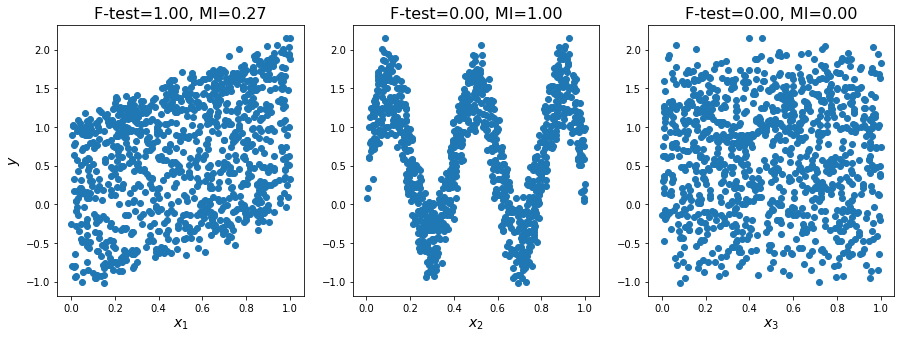

In [58]:
plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.scatter(X[:, i], y)
    plt.xlabel("$x_{}$".format(i + 1), fontsize=14)
    if i == 0:
        plt.ylabel("$y$", fontsize=14)
    plt.title("F-test={:.2f}, MI={:.2f}".format(f_test[i], mi[i]),
              fontsize=16)
plt.show()

We can clearly see how f-test can only capture the linear relationship, whereas MI can capture non-linear relationships as well. You can vary the coefficient of the `sin` component to examine how the MI behaves when the coefficient is made sufficiently low.

### Let's look at some methodologies and techniques  to subset  feature space and make models perform better and efficiently.
***
<br/>
These include :
- Filter Methods
- Wrapper Methods
- Embedded Methods

<img src="../images/Technical-Stuff.png" alt="Technical-Stuff" style="width: 100px;float:left; margin-right:15px"/>
<br />

##  Filter Methods
***

![Filter_1.png](../images/Filter_1.png)
Image Source : https://www.analyticsvidhya.com/blog/2016/12/introduction-to-feature-selection-methods-with-an-example-or-how-to-select-the-right-variables/

* Filter methods are generally used as a preprocessing step. The selection of features is independent of any machine learning algorithms. 
* Instead, features are selected on the basis of their scores in various statistical tests for their correlation with the outcome variable. The correlation is a subjective term here.
* Examples that we just saw above, are some of the filter method techniques.
* For basic guidance, you can refer to the following table for defining correlation co-efficients.

##  Filter Methods

![FS1.png](../images/FS1.png)
[Source: An Analysis of Feature Selection Techniques](http://syllabus.cs.manchester.ac.uk/pgt/2017/COMP61011/goodProjects/Shardlow.pdf)

##  Filter Methods  - Pearson's Correlation
***
**Pearson’s Correlation**: It is used as a measure for quantifying linear dependence between two continuous variables X and Y. Its value varies from -1 to +1. Pearson's correlation is given as:

$$ \rho_{X,Y} = corr(X,Y) = \frac{cov(X,Y)}{\sigma_{X}\sigma_{X}} $$

In [59]:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd


iowa.corr().head()

LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
LotFrontage     1.000000  0.096486     0.181773    -0.055003   0.036465   
LotArea         0.096486  1.000000     0.090016    -0.002869  -0.005921   
OverallQual     0.181773  0.090016     1.000000    -0.136232   0.572082   
OverallCond    -0.055003 -0.002869    -0.136232     1.000000  -0.403602   
YearBuilt       0.036465 -0.005921     0.572082    -0.403602   1.000000   

             YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
LotFrontage      0.078981    0.105703    0.081660   -0.011105   0.155099   
LotArea          0.002764    0.095510    0.210145    0.110011  -0.009707   
OverallQual      0.557772    0.398334    0.223690   -0.073166   0.318552   
OverallCond      0.048340   -0.132515   -0.050818    0.038770  -0.140730   
YearBuilt        0.618058    0.298459    0.229643   -0.066657   0.157525   

               ...      GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
LotFrontage    ...        0.231974   -0.021568     0.073032       0.026765   
LotArea        ...        0.167622    0.166600     0.085056      -0.013427   
OverallQual    ...        0.528107    0.227272     0.319045      -0.106609   
OverallCond    ...       -0.196678   -0.005638    -0.053090       0.063196   
YearBuilt      ...        0.444951    0.213102     0.220775      -0.378630   

             3SsnPorch  ScreenPorch  PoolArea   MiscVal    YrSold  SalePrice  
LotFrontage   0.023441     0.022293  0.115886 -0.064162 -0.014347   0.213331  
LotArea       0.018443     0.038605  0.076868  0.040288 -0.013797   0.252921  
OverallQual   0.024314     0.050580  0.064305 -0.029078 -0.019273   0.787228  
OverallCond   0.026735     0.057507 -0.002274  0.079088  0.050309  -0.095278  
YearBuilt     0.026285    -0.069431  0.001167 -0.033892 -0.006809   0.507584  

[5 rows x 35 columns]

Above are the Pearson correlation coefficients for all the continuous variables depicting their correlation with each other.<br/>
We can take a better view of this by plotting a heatmap.

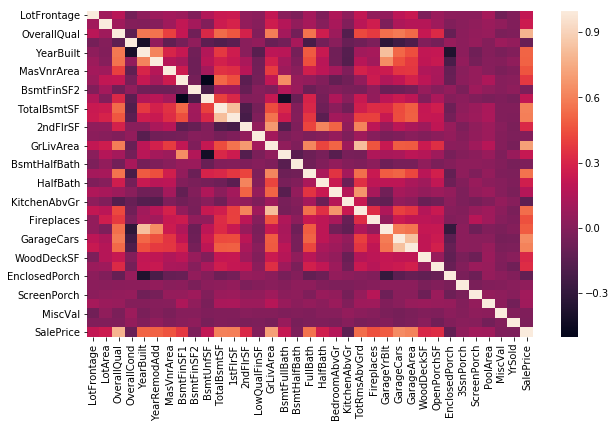

In [60]:
plt.figure(figsize=(10,6))
sns.heatmap(iowa.corr());

##  Filter Methods - LDA (Linear Discriminant Analysis)
***
**LDA**: Linear discriminant analysis is used to find a linear combination of features that characterizes or separates two or more classes (or levels) of a categorical variable.



##  Filter Methods - ANOVA (Analysis Of Variance)
***
**ANOVA**: ANOVA stands for Analysis of variance. It is similar to LDA except for the fact that it is operated using one or more categorical independent features and one continuous dependent feature. It provides a statistical test of whether the means of several groups are equal or not.



##  Filter Methods -  Chi-square
***
**Chi-Square**: It is a is a statistical test applied to the groups of categorical features to evaluate the likelihood of correlation or association between them using their frequency distribution.



### Filter Method - Vulnerability
***
One thing that should be kept in mind is that filter methods do not remove multicollinearity. So, one must deal with multicollinearity of features as well before training models for his/her data.

<img src="../images/Concept-Alert.png" alt="Concept-ALert" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Wrapper Methods
***

![Wrapper_1.png](../images/Wrapper_1.png)
<br/>
Image Source : https://www.analyticsvidhya.com/blog/2016/12/introduction-to-feature-selection-methods-with-an-example-or-how-to-select-the-right-variables/

## Wrapper Methods
***
- In wrapper methods, we try to use a subset of features and train a model using them.
- Based on the inferences that we draw from the previous model, we decide to add or remove features from your subset.
- The problem is essentially reduced to a search problem. These methods are usually computationally very expensive.
- Some common examples of wrapper methods are 
    - Forward feature selection 
    - Backward feature elimination 
    - Recursive feature elimination 

## Wrapper Methods
***

**Forward Feature Selection**: Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till the addition of a new variable does not improve the performance of our model

## Wrapper Methods
***
**Backward Feature Elimination**: In backward elimination, we start with all the features and removes the least significant feature at each iteration which improves the performance of the model. We repeat this until no improvement is observed on removal of features. This technique is also known as **Recursive Feature Elimination.**

**Recursive Feature Elimination (RFE)**

* The Recursive Feature Elimination (RFE) method works by recursively removing attributes and building a model on those attributes that remain.
* It uses an external estimator that assigns weights to features (for example, the coefficients of a linear model) to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.


** Recursive Feature Elimination (RFE)**

* It is a greedy optimization algorithm which aims to find the best performing feature subset.

* It repeatedly creates models and keeps aside the best or the worst performing feature at each iteration. 

* It constructs the next model with the left features until all the features are exhausted. It then ranks the features based on the order of their elimination.

In [61]:
# Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# create a base classifier used to evaluate a subset of attributes
model = LinearRegression()

X, y = iowa.iloc[:,:-1], iowa.iloc[:,-1]
# create the RFE model and select 3 attributes
rfe = RFE(model, 10)
rfe = rfe.fit(X, y)

# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False False  True  True False False False False False False False False
 False False False  True  True  True False  True  True  True  True False
  True False False False False False False False False False]
[ 5 24  1  1  3 10 11 18 21 22 17  7  8 20 15  1  1  1  6  1  1  1  1  4
  1 16 13 23 19 14  9 12 25  2]


<img src="../images/Concept-Alert.png" alt="Concept-ALert" style="width: 100px;float:left; margin-right:15px"/>
<br />

## Embedded Methods
***

![Embedded_1.png](../images/Embedded_1.png)
<br/>
Image Source : https://www.analyticsvidhya.com/blog/2016/12/introduction-to-feature-selection-methods-with-an-example-or-how-to-select-the-right-variables/

* Embedded methods combine the qualities’ of filter and wrapper methods. It’s implemented by algorithms that have their own built-in feature selection methods.
* Some of the most popular examples of these methods are **LASSO and RIDGE** regression which have inbuilt penalization functions to reduce overfitting.
    - Lasso regression performs L1 regularization which adds penalty equivalent to absolute value of the magnitude of coefficients.
    - Ridge regression performs L2 regularization which adds penalty equivalent to square of the magnitude of coefficients.
* We already have learned how these algorithms work.Other examples of embedded methods are Regularized trees, Memetic algorithm, Random multinomial logit.

**Model Based Feature Selection**
* Here are a few algorithms which help us select feature selection:
    - L1 regularized linear regression
    - Decision Trees
    - Random Forests
    - Gradient Boosting Machines


## Difference between Filter and Wrapper methods 
***
The main differences between the filter and wrapper methods for feature selection are:
* Filter methods measure the relevance of features by their correlation with dependent variable while wrapper methods measure the usefulness of a subset of feature by actually training a model on it.
* Filter methods are much faster compared to wrapper methods as they do not involve training the models. On the other hand, wrapper methods are computationally very expensive as well.
* Filter methods use statistical methods for evaluation of a subset of features while wrapper methods use cross validation.
* Filter methods might fail to find the best subset of features in many occasions but wrapper methods can always provide the best subset of features.
* Using the subset of features from the wrapper methods make the model more prone to overfitting as compared to using subset of features from the filter methods.

Let's take an example with Iowa dataset ...

    For this we will be using RandomForest ( we shall learn about the model later )

In [62]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [63]:
from sklearn.feature_selection import SelectFromModel

In [64]:
print('Before');
print(X.shape)

clf = DecisionTreeClassifier()
clf.fit(X, y)

print('\nFeature Importance');
print(clf.feature_importances_)

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)

print('\nAfter'); 
print(X_new.shape)

Before
(1379, 34)

Feature Importance
[0.0423849  0.06420003 0.03447365 0.0284527  0.04178744 0.03518627
 0.04079654 0.062503   0.00824839 0.05586143 0.05431551 0.05336027
 0.02544031 0.00291654 0.05254204 0.01563384 0.00570388 0.00396505
 0.01249945 0.0205708  0.00315958 0.03528473 0.02304059 0.03998698
 0.01019816 0.06401129 0.03662458 0.03984851 0.01546761 0.00583486
 0.01326991 0.         0.00437481 0.04805634]

After
(1379, 17)


In [ ]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=50,
                              random_state=0)

forest.fit(X, y)

In [ ]:
importances = forest.feature_importances_
importances

In [ ]:
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
std

In [ ]:
indices = np.argsort(importances)[::-1]
indices

In [ ]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

In [ ]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

<img src="../images/Recap.png" alt="Recap" style="width: 100px;float:left; margin-right:15px"/>
<br />

# In-session Recap Time
***

* Feature Selection
* Univariate Feature Selection
* Multivariate Feature Selection
* Filter Methods
* Wrapper Methods
* Embedded Methods

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
df = pd.read_csv('../data/diabetes.csv')
df.head()

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

<img src='../images/icon/ppt-icons.png' alt='Mini-Challenge' style="width: 100px;float:left; margin-right:15px"/><br/>

## Mini-Challenge - 1
***
In the diabetes dataset above fit a Logistic Regression model(we'll learn in the next section about it, but for now just import it and fit it without any parameters defined) and using that as an estimator, fit an RFE model with 3 features.

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression



<img src='../images/icon/ppt-icons.png' alt='Mini-Challenge' style="width: 100px;float:left; margin-right:15px"/><br/>

## Mini-Challenge - 2
***
Now determine the selected features and also the ranking of the features

<img src='../images/icon/ppt-icons.png' alt='Mini-Challenge' style="width: 100px;float:left; margin-right:15px"/><br/>

## Mini-Challenge - 3
***
The above assignment does not enlist the features to be selected. Select all the column names and the selected features above and arrange them in their respective order appropriately. 

<img src='../images/icon/ppt-icons.png' alt='Mini-Challenge' style="width: 100px;float:left; margin-right:15px"/><br/>

## Mini-Challenge - 4
***
Find the pearson correlation coefficient for all the features with the output variable in the diabetes dataset

<img src='../images/icon/ppt-icons.png' alt='Mini-Challenge' style="width: 100px;float:left; margin-right:15px"/><br/>

## Mini-Challenge - 5
***
Plot a heatmap depicting the correlation between variables in the diabetes dataset

# Thank You
***
### Next Session: Logistics Regression
For more queries - Reach out to academics@greyatom.com 